In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import scipy.special as sc
import pandas as pd
import statsmodels.api as sm
import scipy.stats as st
import math
import csv
from scipy.interpolate import interp1d

In [3]:
investimentiSvizzeri=pd.read_csv('dataset/InvestimentiSvizzeriSuiTrasporti.csv',sep=',,',decimal='.')
investimentiSvizzeri.head()

C:\Users\aleme\AppData\Local\Temp\ipykernel_8484\548373248.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  investimentiSvizzeri=pd.read_csv('dataset/InvestimentiSvizzeriSuiTrasporti.csv',sep=',,',decimal='.')


,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004,NaN,NaN,NaN,NaN,NaN
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880,NaN,NaN,NaN,NaN,NaN
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125,NaN,NaN,NaN,NaN,NaN
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",",NaN


In [4]:
investimentiSvizzeri[['Unnamed: 0','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]

,Unnamed: 0,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Infrastruttura,4 365,4 527,4 793,4 802,4 871,5 043,5 385,5 509,5 583,5 861,5 745
6,Mezzi di trasporto,4 359,4 336,4 504,4 692,4 803,4 757,4 751,5 085,4 925,5 003,5 103
7,Incidenti,104,110,137,88,103,120,32,58,91,78,71
8,Ambiente e salute,964,986,1 003,1 019,1 041,1 059,1 082,1 098,1 126,1 152,1 085
9,secondo le unità finali d'imputazione,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
investimentiPuliti=investimentiSvizzeri[['Unnamed: 0','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']]
investimentiPuliti = investimentiPuliti.rename(columns={'Unnamed: 0': 'tipo di investimento'})
investimentiPuliti

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Costi del trasporto ferroviario,9 792,9 958,10 437,10 600,10 818,10 979,11 250,11 750,11 724,12 095,12 004
1,secondo l'oggetto di trasporto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trasporto persone,7 736,7 953,8 281,8 556,8 753,8 830,9 169,9 371,9 541,9 893,9 880
3,Trasporto merci,2 057,2 005,2 156,2 045,2 065,2 150,2 081,2 379,2 183,2 201,2 125
4,secondo la categoria di costo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Infrastruttura,4 365,4 527,4 793,4 802,4 871,5 043,5 385,5 509,5 583,5 861,5 745
6,Mezzi di trasporto,4 359,4 336,4 504,4 692,4 803,4 757,4 751,5 085,4 925,5 003,5 103
7,Incidenti,104,110,137,88,103,120,32,58,91,78,71
8,Ambiente e salute,964,986,1 003,1 019,1 041,1 059,1 082,1 098,1 126,1 152,1 085
9,secondo le unità finali d'imputazione,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def convertiRigaInIntero(investimentiPuliti,nomeRiga):
   riga = investimentiPuliti[investimentiPuliti['tipo di investimento'] == nomeRiga]
   year_columns = ['2010', '2011', '2012', '2013', '2014', '2015', 
               '2016', '2017', '2018', '2019', '2020']
   riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
   return riga

In [7]:
trasportiPersone=convertiRigaInIntero(investimentiPuliti,'Trasporto persone')
trasportiMerci=convertiRigaInIntero(investimentiPuliti,'Trasporto merci')

C:\Users\aleme\AppData\Local\Temp\ipykernel_8484\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
C:\Users\aleme\AppData\Local\Temp\ipykernel_8484\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


In [8]:
trasportiPersone

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2,Trasporto persone,7736.0,7953.0,8281.0,8556.0,8753.0,8830.0,9169.0,9371.0,9541.0,9893.0,9880.0


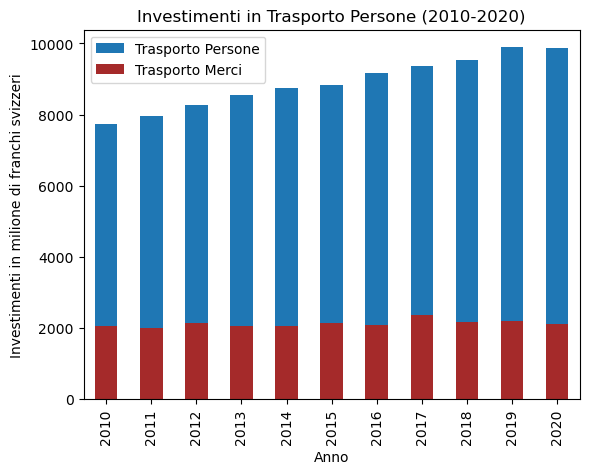

In [9]:
trasportiPersone.iloc[0, 1:].plot(kind='bar')
trasportiMerci.iloc[0, 1:].plot(kind='bar', color='brown')
plt.xlabel('Anno')
plt.ylabel('Investimenti in milione di franchi svizzeri')
plt.title('Investimenti in Trasporto Persone (2010-2020)')
plt.legend(['Trasporto Persone', 'Trasporto Merci'])
plt.show()

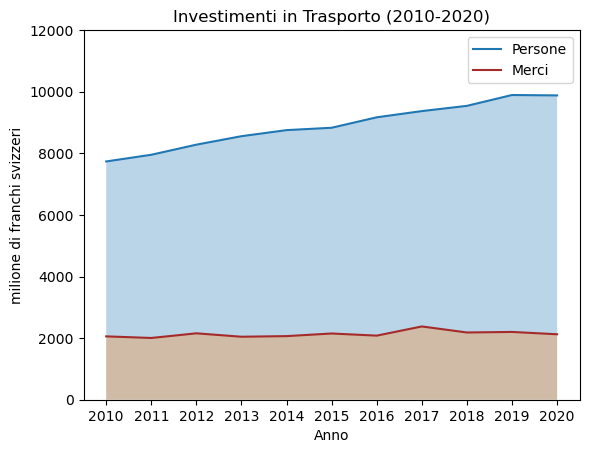

In [10]:
plt.plot(trasportiPersone.columns[1:], trasportiPersone.iloc[0, 1:], label='Persone')
plt.fill_between(trasportiPersone.columns[1:], trasportiPersone.iloc[0, 1:].astype(float), alpha=0.3)
#trasportiMerci.iloc[0, 1:].plot(marker='o', color='brown')
plt.plot(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:], color='brown', label='Merci')
plt.fill_between(trasportiMerci.columns[1:], trasportiMerci.iloc[0, 1:].astype(float), alpha=0.3)
plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Investimenti in Trasporto (2010-2020)')
plt.ylim(0,12000)
plt.legend()
plt.show()

Di quanto sono aumentati gli investimenti sul trasporto delle persone pubblico?

In [11]:
incrementoDecennale=trasportiPersone.iloc[0, 1:].values.max()-trasportiPersone.iloc[0, 1:].values.min()
incrementoDecennale

2157.0

In [12]:
incrementoDecennale/trasportiPersone.iloc[0, 1:].values.min()*100

27.882626680455015

2.157 Miliardi in 10 anni, che rappresenta un incremento del $$ +27.88 \% $$

In [13]:
invInfrastruttura=convertiRigaInIntero(investimentiPuliti,'Infrastruttura')

invMezzi=convertiRigaInIntero(investimentiPuliti,'Mezzi di trasporto')

C:\Users\aleme\AppData\Local\Temp\ipykernel_8484\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)
C:\Users\aleme\AppData\Local\Temp\ipykernel_8484\1486354080.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  riga[year_columns] = riga[year_columns].replace({'\xa0': '', ' ': ''}, regex=True).astype(float)


In [14]:
invInfrastruttura

,tipo di investimento,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,Infrastruttura,4365.0,4527.0,4793.0,4802.0,4871.0,5043.0,5385.0,5509.0,5583.0,5861.0,5745.0


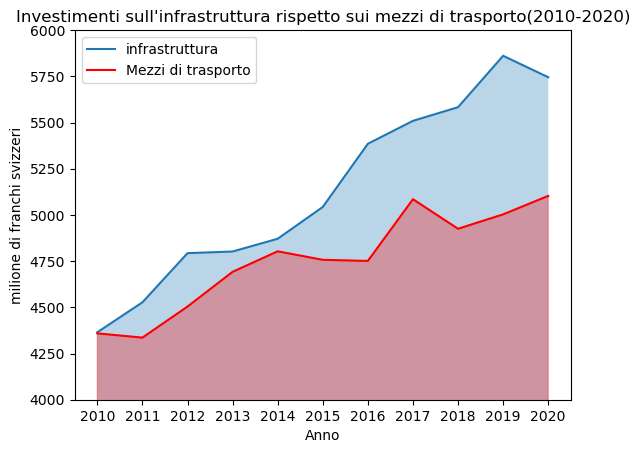

In [15]:
plt.plot(invInfrastruttura.columns[1:], invInfrastruttura.iloc[0, 1:], label='infrastruttura')
plt.plot(invMezzi.columns[1:], invMezzi.iloc[0, 1:], color='red',  label='Mezzi di trasporto')
plt.fill_between(invInfrastruttura.columns[1:], invInfrastruttura.iloc[0, 1:].astype(float), alpha=0.3)
plt.fill_between(invMezzi.columns[1:], invMezzi.iloc[0, 1:].astype(float), color='red',alpha=0.3)
plt.xlabel('Anno')
plt.ylabel('milione di franchi svizzeri')
plt.title('Investimenti sull\'infrastruttura rispetto sui mezzi di trasporto(2010-2020)')
plt.ylim(4000,6000)
plt.legend()
plt.show()

In [16]:
invInfrastruttura.columns[1:]

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [17]:
invInfrastruttura.iloc[0, 1:].index

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [28]:

with open('dataset/InvItaMezziTrasporto.csv', 'r', encoding='utf-8') as file:
    data = file.read()

# Remove the '.' thousands separators
data = data.replace('.', '')
data = data.replace(',', '.')
data = data.replace(' ', ',')

# Write the cleaned data back to the same file
with open('dataset/InvItaMezziTrasporto.csv', 'w', encoding='utf-8') as file:
    file.write(data)

In [34]:
investimentiItaliani=pd.read_csv('dataset/InvItaMezziTrasporto.csv',sep=',',decimal='.')
investimentiItaliani

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Piemonte,2184865.2,2818137.4,2428355.7,2963767.6,2900019.2,3203400.9,2923131.0,2831031.7,3046192.2,...,2374446.1,2286586.5,2009243.6,2112479.4,1910793.5,1919954.1,2085201.2,1944648.3,2110696.1,2189214.5
1,Valle d'Aosta,66188.9,96965.7,131866.3,184283.2,180324.5,198745.5,168971.5,159655.1,161621.1,...,118291.1,92445.4,92018.6,101272.2,105594.5,102547.3,97368.1,88982.5,76061.9,95921.3
2,Liguria,1740907.4,2043224.0,1889241.0,1935658.7,1985731.3,1914879.2,1786075.1,1681659.8,1638457.7,...,1359364.8,1218131.0,1357698.9,1316155.4,1105423.1,1181875.0,1147836.3,1193063.5,1174840.9,1577502.1
3,Lombardia,4461185.2,5084574.6,4715455.4,4955532.4,5245139.4,5755981.7,6069792.5,6528122.5,6174904.0,...,6073047.2,6009082.9,6329971.5,6145688.1,6006381.8,6128007.7,5964439.0,5866326.5,5614861.7,6099575.3
4,Veneto,1937144.8,2391998.4,2591174.4,2863787.8,3111739.3,3071778.7,2975343.4,2949823.1,2899414.9,...,2570534.5,2303082.8,2235946.0,2165522.5,1945170.3,1899367.1,1910838.5,1954812.1,2029169.9,2053476.8
5,Emilia Romagna,2365137.1,2309064.5,2378673.1,2494064.4,2659653.7,2640327.0,2420403.5,2229428.5,2222725.9,...,2052494.4,1953676.7,2001824.8,1841720.5,1651184.3,1740840.4,1761642.4,1835146.9,1822867.5,2009596.4
6,Toscana,2464919.4,2458568.6,2555353.7,3039549.6,3171311.3,3278845.4,2953883.7,2741309.5,2871366.4,...,2339024.5,1834589.5,2086885.4,2012580.5,1749317.7,1976528.0,1797316.3,1899107.5,1785542.6,1885663.5
7,Lazio,4992230.2,9999766.1,5603825.9,5813206.9,6013375.1,6304475.2,7019431.1,8678087.5,5522299.3,...,5733300.7,5381626.1,4724525.4,4793536.8,4038144.7,4169668.0,3765016.2,3722589.5,3788567.4,4172584.6
8,Campania,3614325.0,3734461.6,3112324.3,3606263.0,4031198.0,3668283.3,3727558.8,3944532.5,3600619.0,...,2968305.8,2573522.0,2526542.2,2469547.1,2303293.0,2032784.9,2128515.3,1967423.9,2095817.2,2134624.3
9,Sicilia,1765142.2,2132522.3,1668032.4,1667580.5,1703036.1,1850077.1,1953773.3,1999536.1,1752828.2,...,1515702.9,1368457.5,1292527.1,1466723.6,1295753.7,1281599.4,1446730.7,1383560.9,1405710.1,1692610.6


In [36]:
investimentiItalia=investimentiItaliani[investimentiItaliani['Regione']=='Italia']
investimentiItalia

,Regione,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
15,Italia,32122985.0,40464816.7,33377099.6,36386874.5,37809254.0,39005697.1,39175536.5,40734609.5,36945296.1,...,33328160.8,30695249.8,30178308.1,29914921.7,27290554.5,27584535.8,27659993.9,26996924.4,27332346.9,29658188.8


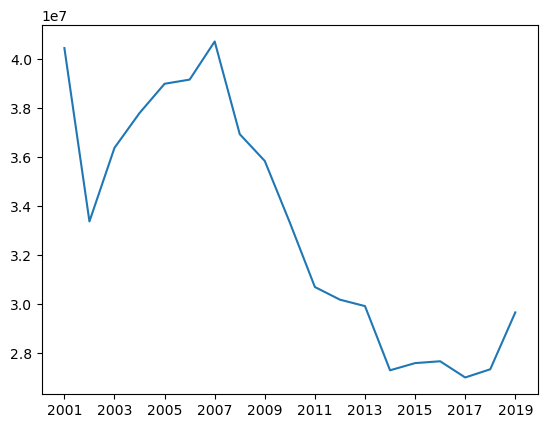

In [47]:
plt.plot(investimentiItalia.columns[2:], investimentiItalia.iloc[0, 2:], label='Italia')
plt.xticks(np.arange(0,19, step=2))
plt.show()

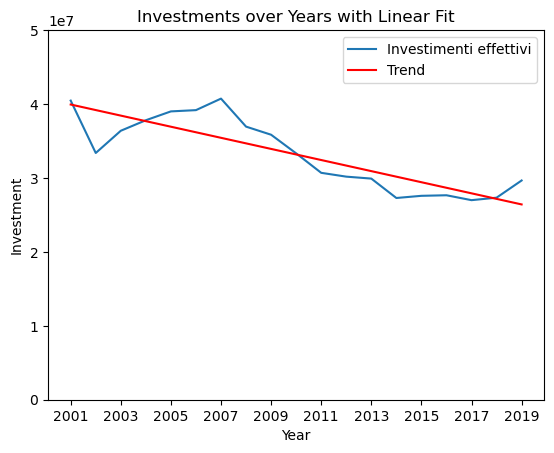

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract x (years) and y (values) data
x = investimentiItalia.columns[2:].astype(int)
y = investimentiItalia.iloc[0, 2:].astype(float)

# Perform linear regression
coefficients = np.polyfit(x, y, deg=1)
linear_fit = np.poly1d(coefficients)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = linear_fit(x_fit)

plt.plot(x, y,label='Investimenti effettivi')

plt.plot(x_fit, y_fit, '-', label='Trend' ,color='red')

plt.xticks(np.arange(x.min(), x.max()+1, step=2))

plt.xlabel('Year')
plt.ylabel('Investment')
plt.title('Investments over Years with Linear Fit')
plt.legend()
plt.ylim(0,50000000)
plt.show()